# Notebook for Curface Creek Sandstone pmag compilation

## import packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag

import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib as mpl
from matplotlib import cm

%config InlineBackend.figure_format = 'retina'

In [2]:
Cutface_specimens = pd.read_csv('../data/Pmag/cutface/specimens.txt', sep='\t', header=1)

Cutface_lat = 47.73055
Cutface_lon = -90.44128

In [3]:
#Cutface_specimens = Cutface_specimens[Cutface_specimens['dir_mad_free'] < 10]

## Plot directions

In [4]:
specimens_lt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_lt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='lt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_mt_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_mt_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='mt') & (Cutface_specimens['dir_tilt_correction']==100)]

specimens_ht_geo = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==0)]
specimens_ht_tc = Cutface_specimens[(Cutface_specimens['dir_comp']=='ht') & (Cutface_specimens['dir_tilt_correction']==100)]

In [5]:
specimens_lt_geo.head()

,specimen,experiments,sample,dir_alpha95,dir_comp,dir_dec,dir_inc,dir_n_comps,dir_n_measurements,dir_tilt_correction,dir_dang,dir_mad_free,meas_step_max,meas_step_min,meas_step_unit,analysts,instrument_codes,software_packages,int_corr,citations,method_codes,result_quality,volume,weight,location,site,specimen_name
4,CF-101a,CF-101a_LP-DIR-T,CF-101a,NaN,lt,5.0,63.3,2.0,3.0,0.0,34.5,14.5,573.0,373.0,K,NaN,hargrave 2021-02-12 14:11:27,pmagpy-4.2.69: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-101a
11,CF-102a,CF-102a_LP-DIR-T,CF-102a,NaN,lt,12.3,71.0,3.0,3.0,0.0,35.0,3.5,473.0,273.0,K,NaN,hargrave 2021-02-13 18:58:05,pmagpy-4.2.69: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-102a
20,CF-103a,CF-103a_LP-DIR-T,CF-103a,NaN,lt,24.2,55.2,3.0,3.0,0.0,38.0,3.8,473.0,273.0,K,NaN,hargrave 2021-02-13 18:59:29,pmagpy-4.2.69: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-103a
29,CF-105a,CF-105a_LP-DIR-T,CF-105a,NaN,lt,23.0,62.5,2.0,3.0,0.0,27.9,6.1,473.0,273.0,K,NaN,hargrave 2021-02-12 14:15:41,pmagpy-4.2.69: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-105a
50,CF-107a,CF-107a_LP-DIR-T,CF-107a,NaN,lt,357.6,75.5,3.0,3.0,0.0,28.4,6.1,573.0,373.0,K,NaN,hargrave 2021-02-13 19:02:26,pmagpy-4.2.69: demag_gui,u,This study,LP-DIR-T:DE-BFL:DA-DIR-GEO,g,NaN,NaN,Cutface Creek,CF,CF-107a


In [6]:
mean_lt = ipmag.fisher_mean(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist())
mean_lt

{'dec': 359.25711595625705,
 'inc': 67.41825277091797,
 'n': 113,
 'r': 110.63856840409576,
 'k': 47.4288563743525,
 'alpha95': 1.9491534423768082,
 'csd': 11.761526527474963}

In [7]:
mean_mt = ipmag.fisher_mean(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
mean_mt

{'dec': 287.17888483239904,
 'inc': 41.57971127654676,
 'n': 160,
 'r': 157.10927995957664,
 'k': 55.003596950437874,
 'alpha95': 1.5158428764393486,
 'csd': 10.921680643707267}

In [8]:
mean_ht = ipmag.fisher_mean(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
mean_ht

{'dec': 287.2295636872718,
 'inc': 29.007417112946914,
 'n': 152,
 'r': 148.44262899177824,
 'k': 42.447076689783025,
 'alpha95': 1.7756643774953274,
 'csd': 12.432576090443026}

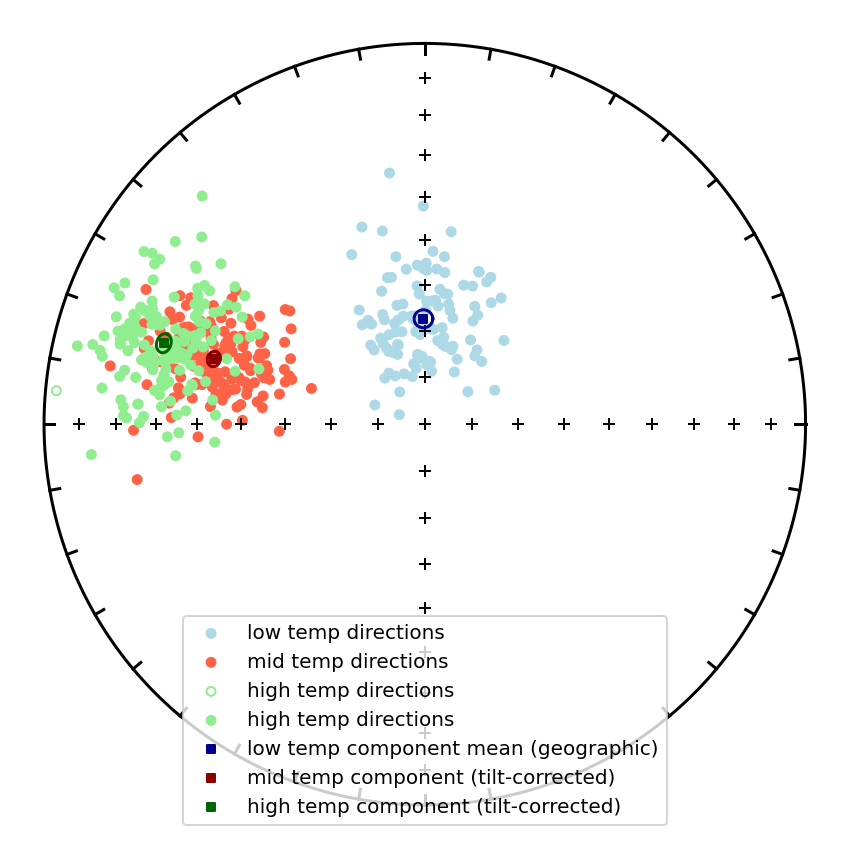

In [9]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='lightblue',label='low temp directions')
ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')
ipmag.plot_di(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist(),color='lightgreen',label='high temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
plt.savefig('code_output/specimen_directions.pdf')
plt.show()

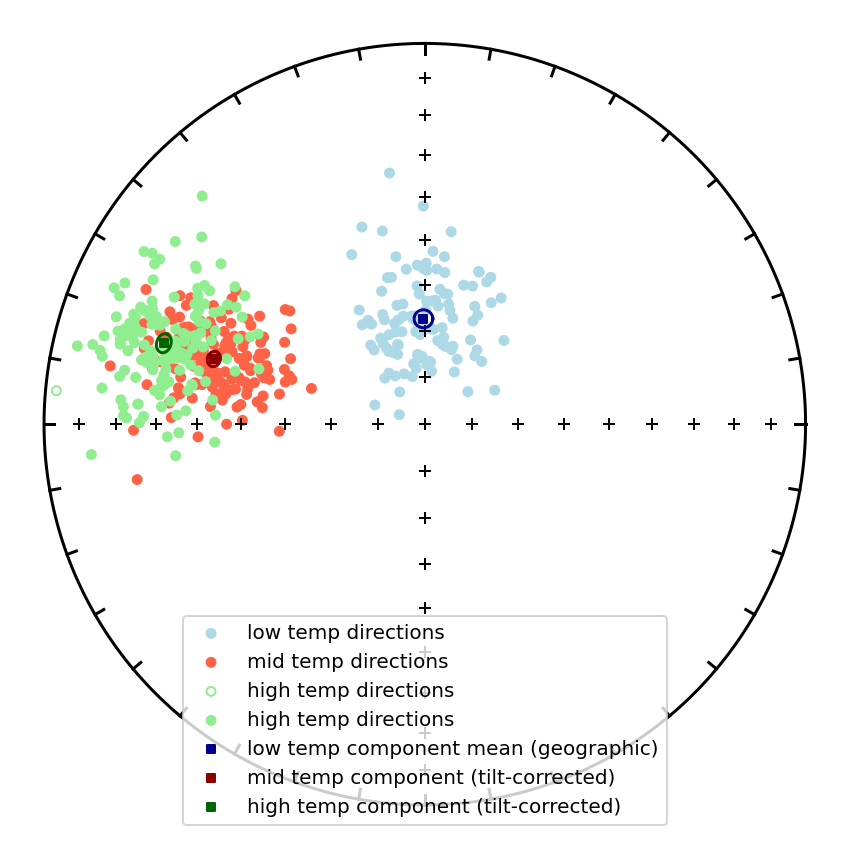

In [10]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di(specimens_lt_geo['dir_dec'].tolist(),specimens_lt_geo['dir_inc'].tolist(),color='lightblue',label='low temp directions')
ipmag.plot_di(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist(),color='tomato',label='mid temp directions')
ipmag.plot_di(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist(),color='lightgreen',label='high temp directions')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component mean (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
plt.savefig('code_output/specimen_directions.pdf')
plt.show()

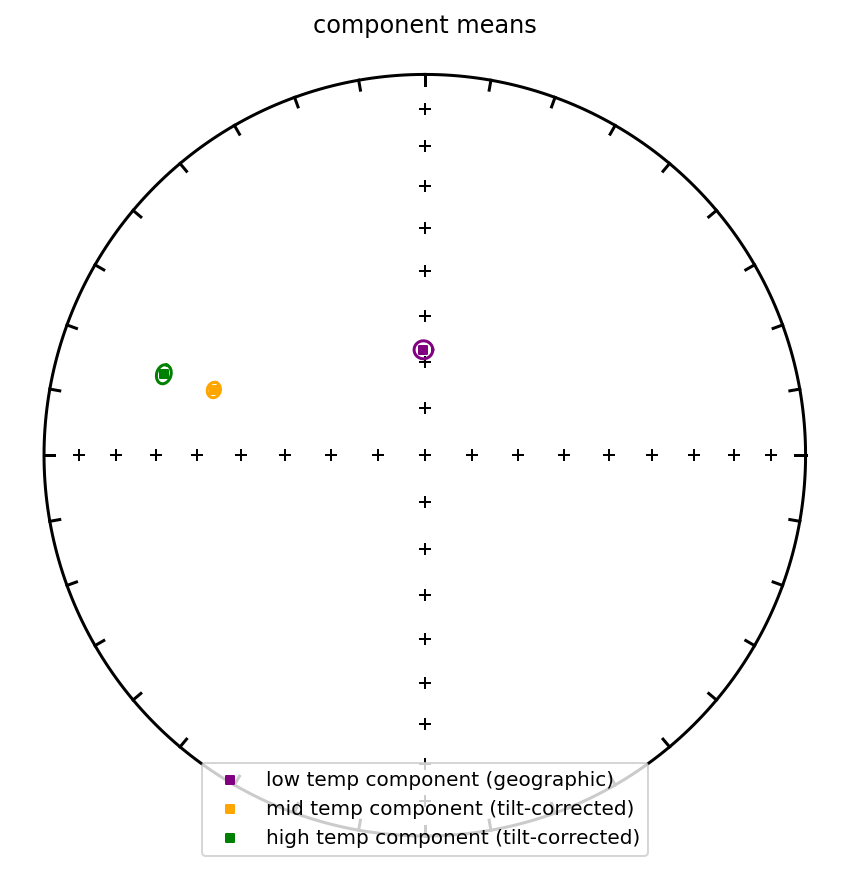

In [11]:
fignum = 1
plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='purple', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='orange', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='green', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
plt.title('component means')
plt.show()

## Plot IGRF, dipole, CF, and NSVG together

### Local geomagnetic field 

Calculate the local geomagnetic field at the study site both using the IGRF model and the long-term dipole field using the dipole equation.

In [12]:
local_igrf = ipmag.igrf([2020.7664, 188, Cutface_lat, Cutface_lon])
local_igrf_dec = local_igrf[0]
local_igrf_inc = local_igrf[1]

local_dipole_dec = 0
local_dipole_inc = ipmag.inc_from_lat(Cutface_lat)

## Expected direction from NSVG

Here we take the NSVG upper northeast sequence pole as calculated in Swanson-Hysell et al. 2019 and determine the predicted direction for the Cutface Creek section.

In [13]:
NSVG_pole_lat = 31.1 
NSVG_pole_lon = 181.7
NSVG_A95 = 4.2

NSVG_dec, NSVG_inc = pmag.vgp_di(NSVG_pole_lat,NSVG_pole_lon,Cutface_lat, Cutface_lon)

In [14]:
print('expected inclination from NSVG data:')
print(NSVG_inc)

expected inclination from NSVG data:
41.43279095168165


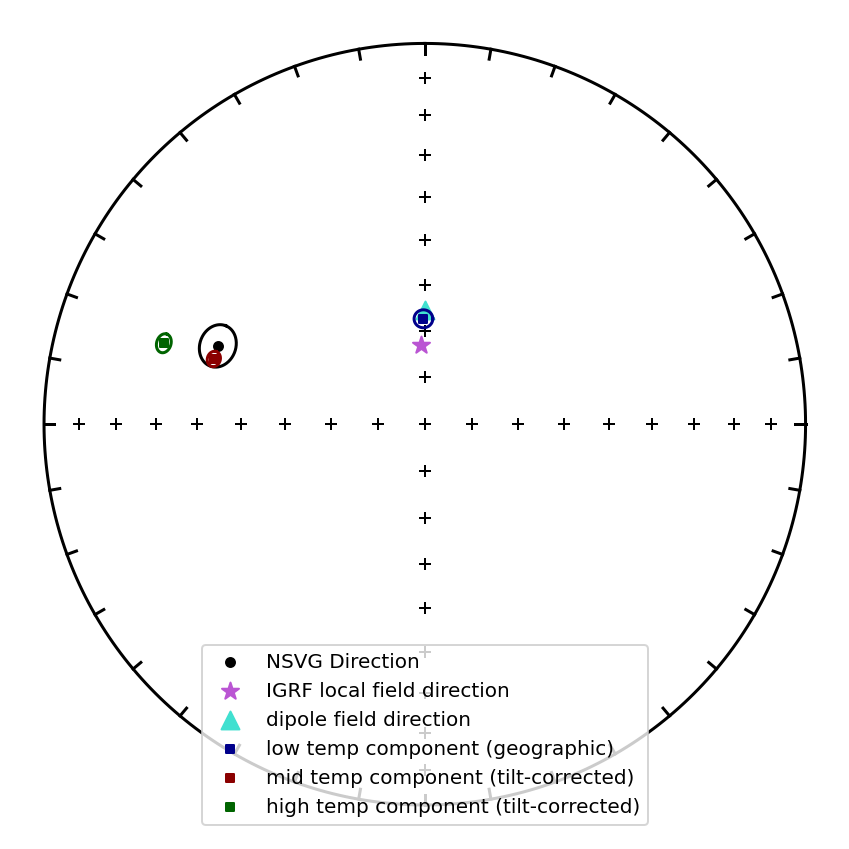

In [15]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(6,6))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') #need to replace with direction A95
ipmag.plot_di([local_igrf_dec],[local_igrf_inc], marker = '*', label='IGRF local field direction', markersize=80, color='mediumorchid')
ipmag.plot_di([local_dipole_dec],[local_dipole_inc], marker = '^',label='dipole field direction',markersize=80, color='turquoise')

ipmag.plot_di_mean(mean_lt['dec'],mean_lt['inc'],mean_lt['alpha95'],
                   color='darkblue', marker = 's', label='low temp component (geographic)')
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

plt.legend(loc=8)
cf_igrf_nsvg_stereonet.savefig('code_output/cf_igrf_nsvg_stereonet.pdf', bbox_inches='tight')
plt.show()

## Empirical flattening factor determination

$tan(I_{observed}) = f*tan(I_{field})$

$I_{observed}$ : inclination of sedimentary rock \
$I_{field}$ : inclination of local magnetic field when rock was magnetized \
$f$ : flattening factor

$f = tan(I_{observed})/tan(I_{field})$

In [16]:
f_factor_ht_mt = np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(mean_mt['inc']))
f_factor_ht_mt

0.624969536078142

In [17]:
f_factor_ht_NSVG = np.tan(np.deg2rad(mean_ht['inc']))/np.tan(np.deg2rad(NSVG_inc))
f_factor_ht_NSVG

0.6282070280566847

**We need to progressive unflattening the ht directions and conduct common mean tests with the population of NSVG NE directions to determine the range of f factors.**

In [18]:
ht_incs_NSVG_unsquish = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(), f_factor_ht_NSVG)
# calculate mean direction of high temp component after unsquishing
ht_mean_NSVG_unsquish = ipmag.fisher_mean(dec=specimens_ht_tc['dir_dec'].tolist(), inc=ht_incs_NSVG_unsquish)

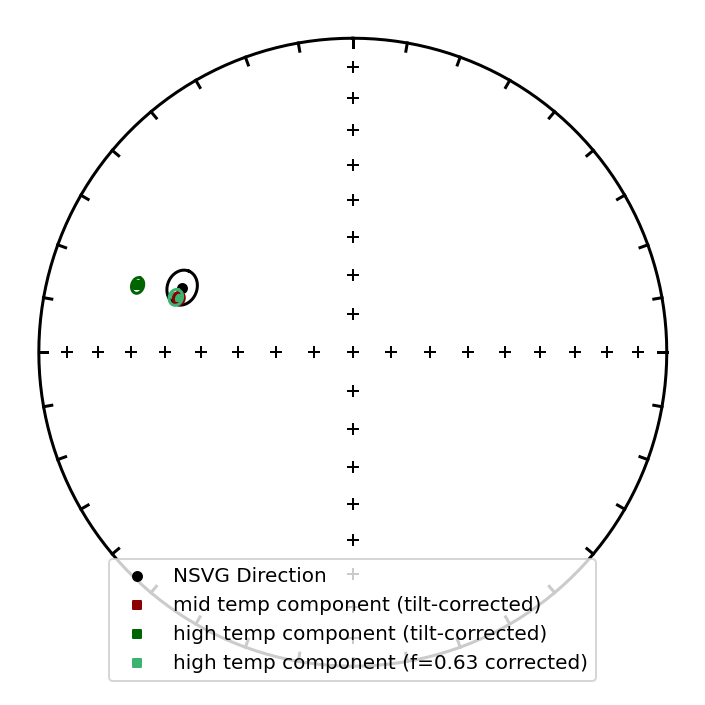

In [19]:
cf_igrf_nsvg_stereonet=plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)

ipmag.plot_di_mean(NSVG_dec, NSVG_inc, NSVG_A95, label='NSVG Direction') #need to replace with direction A95

ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='darkred', marker = 's', label='mid temp component (tilt-corrected)')
ipmag.plot_di_mean(mean_ht['dec'],mean_ht['inc'],mean_ht['alpha95'],
                   color='darkgreen', marker = 's', label='high temp component (tilt-corrected)')

unsquish_label = 'high temp component (f=' + str(np.round(f_factor_ht_NSVG,2)) +  ' corrected)'
ipmag.plot_di_mean(ht_mean_NSVG_unsquish['dec'],ht_mean_NSVG_unsquish['inc'],ht_mean_NSVG_unsquish['alpha95'],
                   color='mediumseagreen', marker = 's', label=unsquish_label)

plt.legend(loc=8)
plt.show()

## Implement the TK03 E/I method

Bootstrapping.... be patient

The original inclination was: 29.035504527698524

The corrected inclination is: 38.516611706965584
with bootstrapped confidence bounds of: 32.46822373257468 to 44.28924816958954
and elongation parameter of: 1.9954487991196233
The flattening factor is: 0.6849999999999997


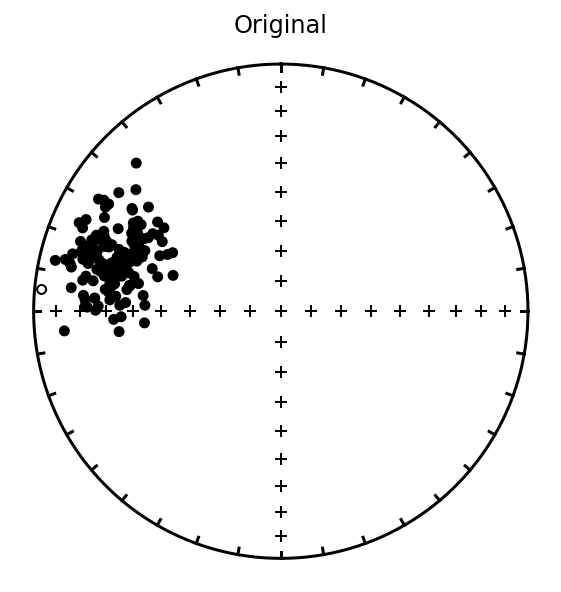

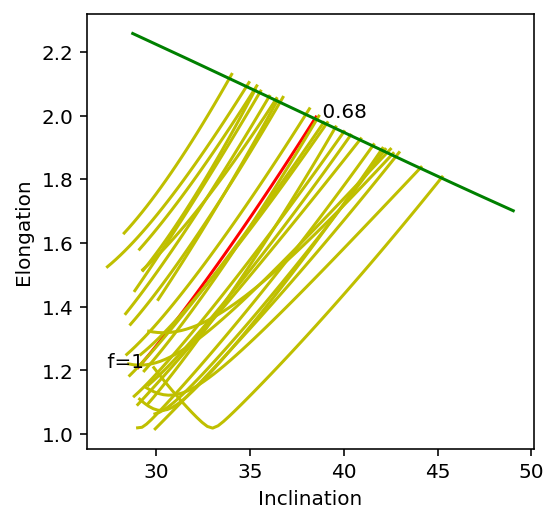

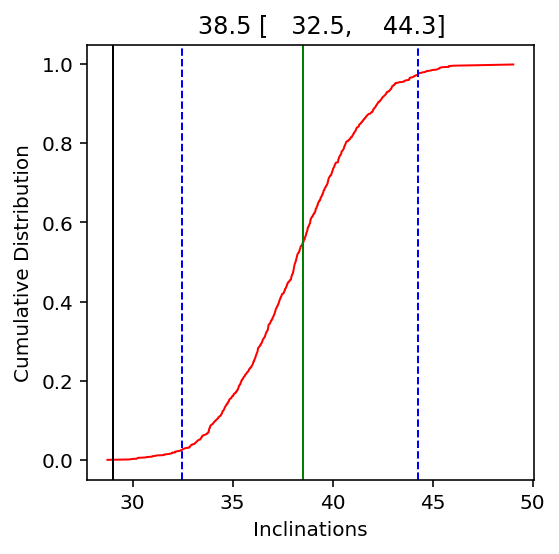

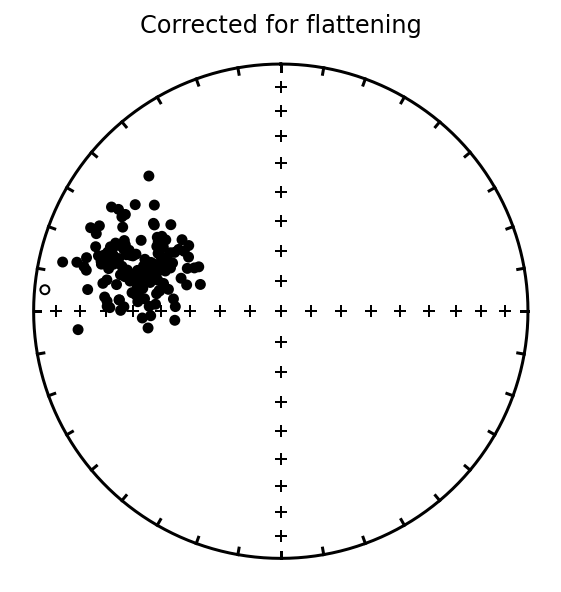

In [76]:
ht_tc_di_block = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),specimens_ht_tc['dir_inc'].tolist())
ht_tc_ei_corrected = ipmag.find_ei(np.array(ht_tc_di_block),save=True,save_folder='./code_output',return_new_dirs=True)

In [53]:
def elongation_calc(di_block):
    princ_comps = pmag.doprinc(di_block)
    elongation = princ_comps['tau2']/princ_comps['tau3']
    return elongation

def elongation_bootstrap(di_block, nb=1000):
    elong_list = []
    inc_list = []
    for n in range(nb): 
        pDIs = pmag.pseudo(di_block)
        pseudo_elong = elongation_calc(pDIs)
        elong_list.append(pseudo_elong)
        mean = pmag.fisher_mean(pDIs)
        inc_list.append(np.absolute(mean['inc']))
    low = round(np.percentile(elong_list, 2.5), 4)
    high = round(np.percentile(elong_list,97.5), 4)
    elong = round(elongation_calc(di_block), 4)
    mean = pmag.fisher_mean(di_block)
    inc = np.absolute(mean['inc'])
    inc_low = round(np.percentile(inc_list, 2.5), 4)
    inc_high = round(np.percentile(inc_list, 97.5), 4)
    return [elong, low, high], [inc, inc_low, inc_high]
    print(elong, low, high, inc, inc_low, inc_high)
    
xa = np.linspace(0,90,num=90)
TK03GAD = 2.895 + -1.466e-2*xa + -3.525e-4*xa**2 + 3.160e-6*xa**3

In [79]:
mt_tc_di_block = ipmag.make_di_block(specimens_mt_tc['dir_dec'].tolist(),specimens_mt_tc['dir_inc'].tolist())
#ipmag.find_ei(np.array(mt_tc_di_block),save=False,save_folder='./code_output')

ht_unsquished_incs = ipmag.unsquish(specimens_ht_tc['dir_inc'].tolist(),f_factor_ht_mt)
ht_di_block_f_corrected = ipmag.make_di_block(specimens_ht_tc['dir_dec'].tolist(),ht_unsquished_incs)

mt_elong, mt_inc = elongation_bootstrap(mt_tc_di_block)
ht_elong, ht_inc = elongation_bootstrap(ht_tc_di_block)
ht_elong_ei, ht_inc_ei = elongation_bootstrap(ht_tc_ei_corrected)
ht_elong_f, ht_inc_f = elongation_bootstrap(ht_di_block_f_corrected)

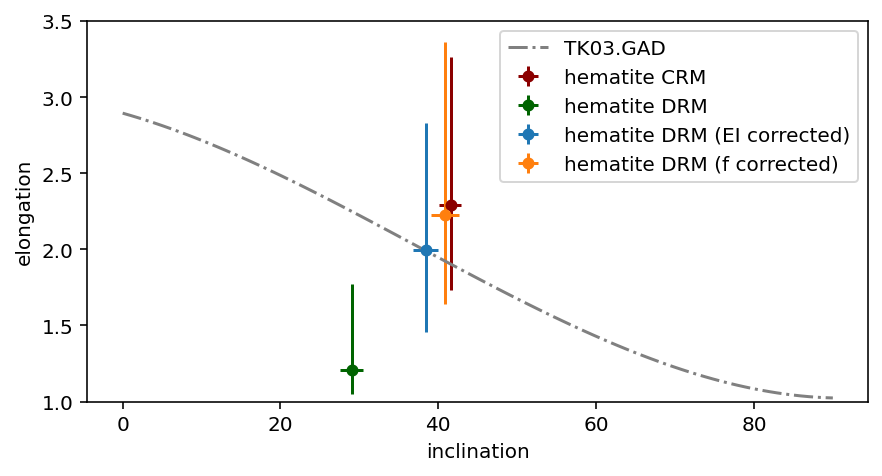

In [89]:
plt.figure(figsize=(7,3.5))
plt.plot(xa,TK03GAD,color='grey',label='TK03.GAD',linestyle='-.')
plt.ylim(1,3.5)
plt.errorbar(mt_inc[0], mt_elong[0], yerr=[[mt_elong[0]-mt_elong[1]],[mt_elong[2]-mt_elong[0]]], 
             xerr=[[mt_inc[0]-mt_inc[1]],[mt_inc[2]-mt_inc[0]]], fmt='o', ms=5,color='darkred', label='hematite CRM')
plt.errorbar(ht_inc[0], ht_elong[0], yerr=[[ht_elong[0]-ht_elong[1]],[ht_elong[2]-ht_elong[0]]], 
             xerr=[[ht_inc[0]-ht_inc[1]],[ht_inc[2]-ht_inc[0]]], fmt='o', ms=5,color='darkgreen', label='hematite DRM')
plt.errorbar(ht_inc_ei[0], ht_elong_ei[0], yerr=[[ht_elong_ei[0]-ht_elong_ei[1]],[ht_elong_ei[2]-ht_elong_ei[0]]], 
             xerr=[[ht_inc_ei[0]-ht_inc_ei[1]],[ht_inc_ei[2]-ht_inc_ei[0]]], fmt='o', ms=5,color='C0', label='hematite DRM (EI corrected)')
plt.errorbar(ht_inc_f[0], ht_elong_f[0], yerr=[[ht_elong_f[0]-ht_elong_f[1]],[ht_elong_f[2]-ht_elong_f[0]]], 
             xerr=[[ht_inc_f[0]-ht_inc_f[1]],[ht_inc_f[2]-ht_inc_f[0]]], fmt='o', ms=5,color='C1', label='hematite DRM (f corrected)')
plt.ylabel('elongation')
plt.xlabel('inclination')
plt.legend(loc=1)
plt.show()

## Let's visualize different unsquishing factors

In [ ]:
def unsquish_factors(decs, incs, n=5):
    # this function explores different unsquishing factors upon CF ht directions
    fignum = 1
    plt.figure(num=fignum,figsize=(8,8))
    ipmag.plot_net(fignum)
    factors = np.linspace(0.1,1, num=n)
    
    undquished_mean_list = [] 
    for i in range(len(factors)):
        unsquished_incs = ipmag.unsquish(incs , factors[i])
        unsquished_mean = ipmag.fisher_mean(decs, unsquished_incs)
        undquished_mean_list.append(unsquished_mean)
        ipmag.plot_di_mean(unsquished_mean['dec'],unsquished_mean['inc'],unsquished_mean['alpha95'],
                   color='C'+str(i), marker = 'd', label='high temp component unsquished with factor '+str(round(factors[i], 1)))
    plt.legend(loc=8)
    return undquished_mean_list
# calculate mean direction of high temp component after unsquishing

In [ ]:
CF_undquished_mean_list = unsquish_factors(specimens_ht_tc['dir_dec'].tolist(), specimens_ht_tc['dir_inc'].tolist(), n=10) 
ipmag.plot_di_mean(mean_mt['dec'],mean_mt['inc'],mean_mt['alpha95'],
                   color='black', marker = 's', label='mid temp component (tilt-corrected)')

In [ ]:
CF_undquished_mean_list[:5]

## plot everything as poles

In [ ]:
NSVG_NE_plon = 181.7
NSVG_NE_plat = 31.1

CF_lat = 47.7
CF_lon = -90.44

    
plt.figure(figsize=(5, 5))
map_axis=ipmag.make_orthographic_map(central_longitude=200,central_latitude=20)

ipmag.plot_pole(map_axis,188,28,2.5,label='Schroeder Lutsen Basalts', marker='s',color='Blue')
ipmag.plot_pole(map_axis,182,31,4.2,label='North Shore Volcanic Group (upper NE)',marker='s',color='Red')

for i, mean_dir in enumerate(CF_undquished_mean_list):
    plon, plat, dp, dm = pmag.dia_vgp(mean_dir['dec'], mean_dir['inc'], mean_dir['alpha95'], CF_lat, CF_lon)
    
    ipmag.plot_pole(map_axis,plon,plat, mean_dir['alpha95'],label='CF pole unsquished by: '+ str(i/len(CF_undquished_mean_list)),
               marker='s',color='C'+str(i))

plt.legend()
plt.show()

## Plot theoretical expected inclination vs observed inclination

In [ ]:
expected_incs = np.linspace(0,90,91)
expected_incs_rad = expected_incs*(np.pi/180)
measured_inc_f_9 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.9)
measured_inc_f_8 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.8)
measured_inc_f_7 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.7)
measured_inc_f_6 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.6)
measured_inc_f_5 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.5)
measured_inc_f_4 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.4)
measured_inc_f_3 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.3)
measured_inc_f_2 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.2)
measured_inc_f_1 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.1)
measured_inc_f_05 = (180/np.pi)*np.arctan(np.tan(expected_incs_rad)*.05)

In [ ]:
NE_NSVG_inc = 40.3

nsvg_f_9 = ipmag.squish(NE_NSVG_inc,.9)
nsvg_f_8 = ipmag.squish(NE_NSVG_inc,.8)
nsvg_f_7 = ipmag.squish(NE_NSVG_inc,.7)
nsvg_f_6 = ipmag.squish(NE_NSVG_inc,.6)
nsvg_f_5 = ipmag.squish(NE_NSVG_inc,.5)
nsvg_f_4 = ipmag.squish(NE_NSVG_inc,.4)
nsvg_f_3 = ipmag.squish(NE_NSVG_inc,.3)

In [ ]:
viridis = cm.get_cmap('viridis', 7)

In [ ]:
obs_vs_measure_plot = plt.figure(figsize=(5,5))
plt.plot([0,90],[0,90], label='No flattening', color='black')
plt.scatter(NE_NSVG_inc,NE_NSVG_inc,color='black',edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_9, label='0.9', color=viridis(0))
plt.scatter(NE_NSVG_inc,nsvg_f_9,color=viridis(0),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_8, label='0.8', color=viridis(1))
plt.scatter(NE_NSVG_inc,nsvg_f_8,color=viridis(1),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_7, label='0.7', color=viridis(2))
plt.scatter(NE_NSVG_inc,nsvg_f_7,color=viridis(2),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_6, label='0.6', color=viridis(3))
plt.scatter(NE_NSVG_inc,nsvg_f_6,color=viridis(3),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_5, label='0.5', color=viridis(4))
plt.scatter(NE_NSVG_inc,nsvg_f_5,color=viridis(4),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_4, label='0.4', color=viridis(5))
plt.scatter(NE_NSVG_inc,nsvg_f_4,color=viridis(5),edgecolors='black',zorder=100)
plt.plot(expected_incs,measured_inc_f_3, label='0.3', color=viridis(6))
plt.scatter(NE_NSVG_inc,nsvg_f_3,color=viridis(6),edgecolors='black',zorder=100)
#plt.plot(expected_incs,measured_inc_f_2)
#plt.plot(expected_incs,measured_inc_f_1)
#plt.plot(expected_incs,measured_inc_f_05)
#plt.title('Corrected vs Observed Inclination')
plt.legend(title='flattening factor (f)')
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel('field inclination')
plt.ylabel('observed inclination')
obs_vs_measure_plot.savefig('code_output/field_vs_measure_plot.pdf', bbox_inches='tight')
plt.show()

In [ ]:
upper_nsvg_shallowing = plt.figure(num=fignum,figsize=(4.5,4.5))
ipmag.plot_net(fignum)
ipmag.plot_di(291.3, 40.3, label='1.0: NSVG Direction' )
ipmag.plot_di(291.3, nsvg_f_9, color=viridis(0), label='0.9',edge='black')
ipmag.plot_di(291.3, nsvg_f_8, color=viridis(1), label='0.8',edge='black')
ipmag.plot_di(291.3, nsvg_f_7, color=viridis(2), label='0.7',edge='black')
ipmag.plot_di(291.3, nsvg_f_6, color=viridis(3), label='0.6',edge='black')
ipmag.plot_di(291.3, nsvg_f_5, color=viridis(4), label='0.5',edge='black')
ipmag.plot_di(291.3, nsvg_f_4, color=viridis(5), label='0.4',edge='black')
ipmag.plot_di(291.3, nsvg_f_3, color=viridis(6), label='0.3',edge='black')
plt.legend(loc=8,title='flattening factor (f)',bbox_to_anchor=(0.75,0.02))
#plt.title('Shallowing of the Upper Northeast Sequence NSVG Direction', size=16)
upper_nsvg_shallowing.savefig('code_output/upper_nsvg_shallowing.pdf', bbox_inches='tight')
plt.show()

## Simulate draws from a Fisher distribution and squish them

In [ ]:
NSVG_sim = ipmag.fishrot(k=30,n=100,dec=291.3,inc=40.3)
NSVG_sim_dec, NSVG_sim_inc, mag_moment = ipmag.unpack_di_block(NSVG_sim)

NSVG_sim_inc_squished = ipmag.squish(NSVG_sim_inc, 0.6)

In [ ]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc)
ipmag.plot_di(NSVG_sim_dec, NSVG_sim_inc_squished,color=viridis(3))

In [ ]:
NSVG_sim_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc)
NSVG_sim_mean

In [ ]:
NSVG_sim_squished_mean = ipmag.fisher_mean(NSVG_sim_dec, NSVG_sim_inc_squished)
NSVG_sim_squished_mean

In [ ]:
plt.figure(num=fignum,figsize=(5,5))
ipmag.plot_net(fignum)
ipmag.plot_di_mean(NSVG_sim_mean['dec'],NSVG_sim_mean['inc'],NSVG_sim_mean['alpha95'])
ipmag.plot_di_mean(NSVG_sim_squished_mean['dec'],NSVG_sim_squished_mean['inc'],
                   NSVG_sim_squished_mean['alpha95'],color=viridis(3))